
# Mini Reto 005 del grupo Python para Trading

# Indicadores - Cruce de medias moviles simples (SMA)

El objetivo de este mini reto es utilizar el indicador de SMA (Simple Moving Average) o media móvil simple, para hacer una estrategía simple de trading, con la que obtener señales de compra y venta.

El objetivo de este reto es:

- Conocer el indicador SMA y saber aplicarlo a los precios de una acción.
- Aplicar dos medias, rapida y lenta, para identificar los cruces.
- Detectar los cruces para generar señaes de compra y venta.

Para ello, partiendo del código que hay a continuación, se pide realizar los siguientes pasos:

1) Calcular en la columna `slow_SMA` y `fast_SMA` los valores correspondientes respecto a la columna `Close`

2) Detectar los cruces creando una columna `long_signal` y otra `short_signal` que valgan True cuando se produzca el cruce de medias y False el resto de los períodos.

3) Pintar en una gráfica el precio `Close` las medias rapidas y lentas `slow_SMA` `fast_SMA` y las señales de compra `long_signal` y venta `short_signal` en forma de triangulo, tal y como se indica en la siguiente imagen de resultado.

![Resultado](Resultado.png)


### Partir de el siguiente código

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('seaborn-whitegrid')

In [2]:
fast_SMA = 9
slow_SMA = 30
aapl = yf.download('AAPL', '2020-1-1', '2020-10-25')

[*********************100%***********************]  1 of 1 completed


## Solución de [Paduel](https://t.me/paduel)  (Tipo Pure Pandas)

### 1) Calcular en la columna slow_SMA y fast_SMA los valores correspondientes respecto a la columna Close

<h3 style="color:olive">Para calcular las medias, ya que es el mismo indicador con diferente periodo, usamos un diccionario para no repetir código. En este caso solo son 2, pero esta solución es especialmente útil cuando usamos un gran numero de combinaciones de parametros para un mismo indicador.</h3> 

In [3]:
periods = {'fast_SMA': 9,
           'slow_SMA': 30}

for name, period in periods.items():
    aapl[name] = aapl["Close"].rolling(period).mean()

### 2) Detectar los cruces creando una columna long_signal y otra short_signal que valgan True cuando se produzca el cruce de medias y False el resto de los períodos.

<h3 style="color:olive">Calculamos la columna cross, que ya contiene toda la información de los cruces marcandolos como +1 cruce de sma rápida hacia arriba y -1 cruce sma rápida hacia abajo. A partir de esta calculamos las dos cólumnas solicitadas long_signal y short_signal</h3> 

In [4]:
aapl['cross'] = aapl['fast_SMA'].gt(aapl['slow_SMA']).mul(1).diff().fillna(0)
aapl['long_signal'] = aapl['cross'][aapl['cross'].gt(0)]
aapl['short_signal'] = aapl['cross'][aapl['cross'].lt(0)]
aapl[['long_signal', 'short_signal']] = ~aapl[[
    'long_signal', 'short_signal']].isna()

#### 3) Pintar en una gráfica el precio Close las medias rapidas y lentas slow_SMA fast_SMA y las señales de compra long_signal y venta short_signal en forma de triangulo, tal y como se indica en la siguiente imagen de resultado.

<h3 style="color:olive">Para graficar usamos las propias funciones de Pandas.</h3> 

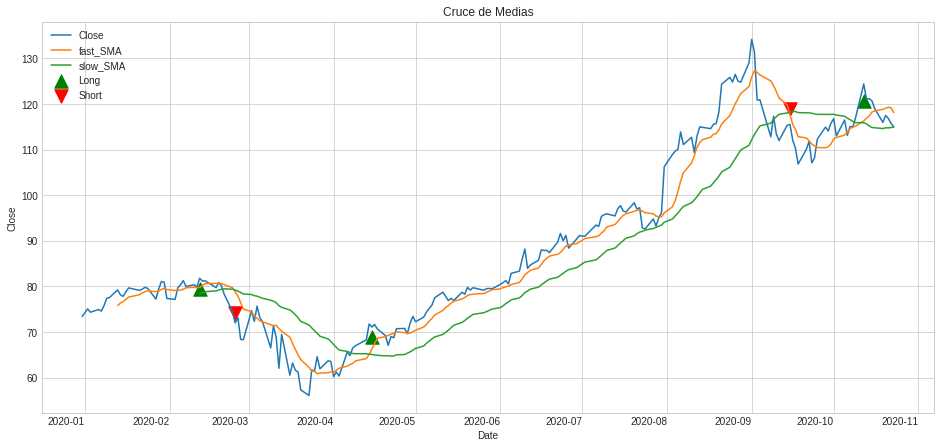

In [5]:
ax = aapl[['Close', 'fast_SMA', 'slow_SMA']].plot(
    figsize=(16, 8), title='Cruce de Medias')
aapl['Close'][aapl['long_signal']].mul(.97).reset_index().plot.scatter(
    x='Date', y='Close', marker='^', ax=ax, color='g', s=180, label='Long')
aapl['Close'][aapl['short_signal']].mul(1.03).reset_index().plot.scatter(
    x='Date', y='Close', marker='v', ax=ax, color='r', s=180, label='Short')